In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 加载图像并将其转换为灰度图像
img = cv2.imread('./2-2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# 高斯滤波降噪
gaussian_img = cv2.GaussianBlur(gray, (7, 7), 0)

In [4]:
# 边缘检测
edges = cv2.Canny(gaussian_img, 50, 150)

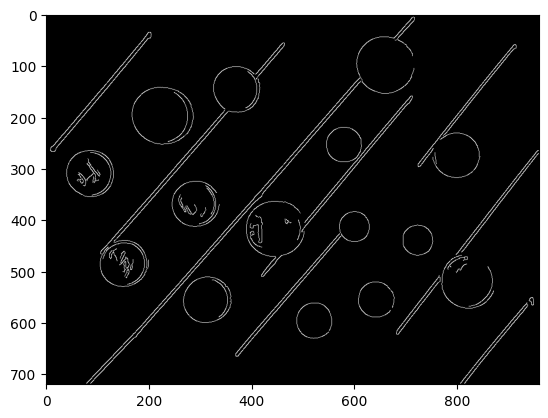

In [5]:
plt.imshow(edges, cmap='gray')

In [6]:
# 使用Hough圆变换检测硬币
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 100, param1=50, param2=20, minRadius=0, maxRadius=70)

In [7]:
# 统计检测到的硬币数量
num_of_coins = 0
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        num_of_coins += 1

In [8]:
# 使用Hough线变换检测线条
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 80, minLineLength=10, maxLineGap=10)

In [11]:
# 应用非最大抑制
def non_max_suppression(boxes, overlapThresh):
    if len(boxes) == 0:
        return []

    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    pick = []

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        suppress = [last]

        for pos in range(last):
            j = idxs[pos]

            xx1 = max(x1[i], x1[j])
            yy1 = max(y1[i], y1[j])
            xx2 = min(x2[i], x2[j])
            yy2 = min(y2[i], y2[j])

            w = max(0, xx2 - xx1 + 1)
            h = max(0, yy2 - yy1 + 1)

            overlap = float(w * h) / area[j]

            if overlap > overlapThresh:
                suppress.append(pos)

        idxs = np.delete(idxs, suppress)

    return boxes[pick].astype("int")

In [9]:
# 统计检测到的线条数量
num_of_lines = 0
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        num_of_lines += 1

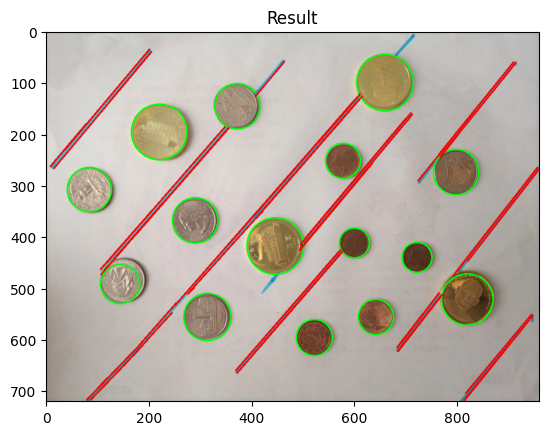

Number of coins:  15
Number of lines:  49


In [10]:
# 使用Matplotlib显示结果
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Result')
plt.show()

# 打印检测到的硬币数目和线条数
print("Number of coins: ", num_of_coins)
print("Number of lines: ", num_of_lines)

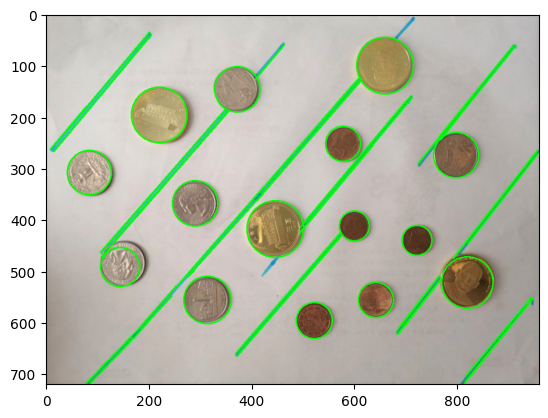

In [12]:
# 应用非最大抑制来消除重叠的线段
new_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    new_lines.append([x1, y1, x2, y2])

new_lines = np.array(new_lines)
new_lines = non_max_suppression(new_lines, 0.1)

# 将检测到的线绘制到图像上
for line in new_lines:
    x1, y1, x2, y2 = line
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 显示图像
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()